In [1]:
import os
import shutil
import random

# Read-only dataset path
dataset_dir = "/kaggle/input/oct-images-dataset/"  # Change this to your dataset path
writable_dir = "/kaggle/working/dataset"  # Writable directory

# Copy dataset to a writable location
if not os.path.exists(writable_dir):
    shutil.copytree(dataset_dir, writable_dir)

# Define train, val, test directories
train_dir = os.path.join(writable_dir, "train")
val_dir = os.path.join(writable_dir, "val")
test_dir = os.path.join(writable_dir, "test")

# Create train, val, test directories
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Get all subfolders (classes)
subfolders = [f for f in os.listdir(writable_dir) if os.path.isdir(os.path.join(writable_dir, f))]

# Process each class folder separately
for subfolder in subfolders:
    subfolder_path = os.path.join(writable_dir, subfolder)

    # Get all images in this class
    all_images = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(all_images)  # Shuffle before splitting

    # Define split sizes
    train_split = int(0.7 * len(all_images))
    val_split = int(0.9 * len(all_images))  # 70% train, next 20% val, last 10% test

    # Create class-specific subdirectories
    os.makedirs(os.path.join(train_dir, subfolder), exist_ok=True)
    os.makedirs(os.path.join(val_dir, subfolder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, subfolder), exist_ok=True)

    # Move images to respective folders
    for i, img in enumerate(all_images):
        src_path = os.path.join(subfolder_path, img)

        if i < train_split:
            dest_path = os.path.join(train_dir, subfolder, img)
        elif i < val_split:
            dest_path = os.path.join(val_dir, subfolder, img)
        else:
            dest_path = os.path.join(test_dir, subfolder, img)

        shutil.move(src_path, dest_path)

print(f"Dataset split complete! ✅")
print(f"Train contains {len(os.listdir(train_dir))} classes.")
print(f"Validation contains {len(os.listdir(val_dir))} classes.")
print(f"Test contains {len(os.listdir(test_dir))} classes.")


Dataset split complete! ✅
Train contains 7 classes.
Validation contains 7 classes.
Test contains 7 classes.


Found 15301 files belonging to 7 classes.
Found 4372 files belonging to 7 classes.
Found 2188 files belonging to 7 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/75
479/479 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.5594 - loss: 1.1376 - val_accuracy: 0.7043 - val_loss: 0.8315
Epoch 2/75
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.7082 - loss: 0.8328 - val_accuracy: 0.7271 - val_loss: 0.7637
Epoch 3/75
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7268 - loss: 0.7710 - val_accuracy: 0.7500 - val_loss: 0.6974
Epoch 4/75
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7486 - loss: 0.7167 - val_accuracy: 0.7328 - val_loss: 0.7358
Epoch 5/75
479/479 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7525 - loss: 0.6970 - val_accuracy: 0.7628 - val_loss: 0.6518
Epoch 6/75
479/479 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7566 - loss: 0.6872 - val_accuracy: 0.7669 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

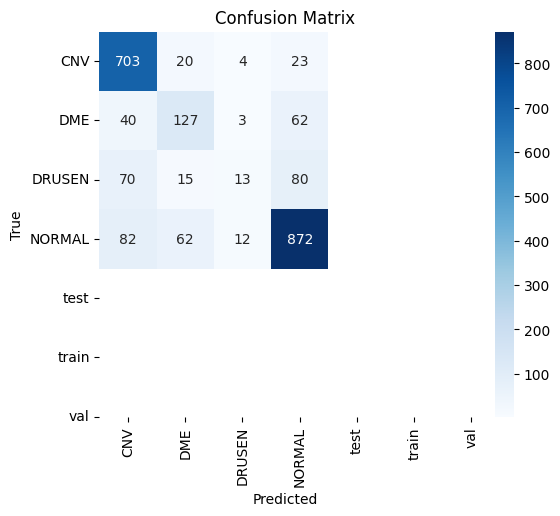

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: NORMAL


In [2]:
# UGG16 X ResNet Hybrid Model for classification: Higher accuracy score, so kept
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image

data_dir = "/kaggle/working/dataset"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

image_size = (64, 64)
batch_size = 32

train_dataset = keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=image_size, batch_size=batch_size, shuffle=True
)

val_dataset = keras.preprocessing.image_dataset_from_directory(
    val_dir, image_size=image_size, batch_size=batch_size, shuffle=False
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    test_dir, image_size=image_size, batch_size=batch_size, shuffle=False
)

class_names = train_dataset.class_names
num_classes = len(class_names)

normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: ((normalization_layer(x), normalization_layer(x)), y))
val_dataset = val_dataset.map(lambda x, y: ((normalization_layer(x), normalization_layer(x)), y))
test_dataset = test_dataset.map(lambda x, y: ((normalization_layer(x), normalization_layer(x)), y))

vgg16 = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
vgg16.trainable = False

resnet50 = keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
resnet50.trainable = False
vgg16_output = layers.Flatten()(vgg16.output)
resnet50_output = layers.Flatten()(resnet50.output)

merged = layers.concatenate([vgg16_output, resnet50_output])

x = layers.Dense(512, activation="relu")(merged)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=[vgg16.input, resnet50.input], outputs=output)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=75
)

model.save("Hybrid_VGG16_ResNet50.h5")
print("✅ Model saved successfully!")

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

y_true, y_pred = [], []
for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Update the classification_report call
print(classification_report(y_true, y_pred, target_names=class_names, labels=range(num_classes)))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

def predict_image(image_path, model):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((64, 64))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict((image, image))
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class]

image_path = "/kaggle/input/imagetesting/DRUSEN-1001666-5.jpeg"
prediction = predict_image(image_path, model)
print(f"Predicted Class: {prediction}")



In [3]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)
model.save("Hybrid_VGG16_ResNet50.h5")
print("✅ Model saved successfully!")

Epoch 1/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8659 - loss: 0.3768 - val_accuracy: 0.8049 - val_loss: 0.6130
Epoch 2/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8615 - loss: 0.3884 - val_accuracy: 0.8044 - val_loss: 0.6024
Epoch 3/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8612 - loss: 0.3797 - val_accuracy: 0.8079 - val_loss: 0.6168
Epoch 4/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8619 - loss: 0.3750 - val_accuracy: 0.8015 - val_loss: 0.6207
Epoch 5/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8610 - loss: 0.3766 - val_accuracy: 0.8031 - val_loss: 0.6031
✅ Model saved successfully!


In [4]:
history2 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)
model.save("Hybrid_VGG16_ResNet50.h5")
print("✅ Model saved successfully!")

Epoch 1/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8619 - loss: 0.3855 - val_accuracy: 0.8024 - val_loss: 0.6188
Epoch 2/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8678 - loss: 0.3585 - val_accuracy: 0.7996 - val_loss: 0.6263
Epoch 3/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8672 - loss: 0.3627 - val_accuracy: 0.8040 - val_loss: 0.6188
Epoch 4/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8658 - loss: 0.3713 - val_accuracy: 0.8022 - val_loss: 0.6257
Epoch 5/5
479/479 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8703 - loss: 0.3630 - val_accuracy: 0.8072 - val_loss: 0.6232
✅ Model saved successfully!


In [5]:
model.save("OCT_model.h5")

**CHECKING FOR ANOTHER MODEL**

In [6]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, classification_report
# from PIL import Image

# # Load dataset
# data_dir = "/kaggle/working/dataset"
# train_dir = os.path.join(data_dir, "train")
# val_dir = os.path.join(data_dir, "val")
# test_dir = os.path.join(data_dir, "test")

# image_size = (64, 64)
# batch_size = 32

# train_dataset = keras.preprocessing.image_dataset_from_directory(
#     train_dir, image_size=image_size, batch_size=batch_size, shuffle=True
# )

# val_dataset = keras.preprocessing.image_dataset_from_directory(
#     val_dir, image_size=image_size, batch_size=batch_size, shuffle=False
# )

# test_dataset = keras.preprocessing.image_dataset_from_directory(
#     test_dir, image_size=image_size, batch_size=batch_size, shuffle=False
# )

# class_names = train_dataset.class_names
# num_classes = len(class_names)

# # Apply normalization
# normalization_layer = layers.Rescaling(1./255)
# train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
# val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
# test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Load VGG16 & ResNet50
# vgg16 = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
# resnet50 = keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# vgg16.trainable = False
# resnet50.trainable = False

# # Define Inputs
# input_layer = keras.Input(shape=(64, 64, 3))

# # Pass input through both models
# vgg16_features = vgg16(input_layer)
# resnet50_features = resnet50(input_layer)

# # Global pooling to reduce dimensionality
# vgg16_output = layers.GlobalAveragePooling2D()(vgg16_features)
# resnet50_output = layers.GlobalAveragePooling2D()(resnet50_features)

# # Concatenate outputs
# merged = layers.concatenate([vgg16_output, resnet50_output])

# # Fully Connected Layers
# x = layers.Dense(512, activation="relu")(merged)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dense(128, activation="relu")(x)
# output = layers.Dense(num_classes, activation="softmax")(x)

# # Define Model with a single input layer
# model = keras.Model(inputs=input_layer, outputs=output)

# # Compile Model
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

# # Train Model
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=50
# )

# # Save Model
# model.save("Hybrid_VGG16_ResNet50.h5")
# print("✅ Model saved successfully!")

# # Evaluate Model
# test_loss, test_acc = model.evaluate(test_dataset)
# print(f"Test Accuracy: {test_acc:.4f}")

# # Predictions & Confusion Matrix
# y_true, y_pred = [], []
# for images, labels in test_dataset:
#     preds = model.predict(images)
#     y_true.extend(labels.numpy())
#     y_pred.extend(np.argmax(preds, axis=1))

# print(classification_report(y_true, y_pred, target_names=class_names))

# cm = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix")
# plt.show()


In [7]:
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=25
# )